#**Secret of Academic Success**






### Social, gender and study data from secondary school students.

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students.



Source Information:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

University Of Camerino

https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION

# Objective

**Data Dictionary**

You can refer to the [data page](https://www.kaggle.com/uciml/student-alcohol-consumption) for the data dictionary.

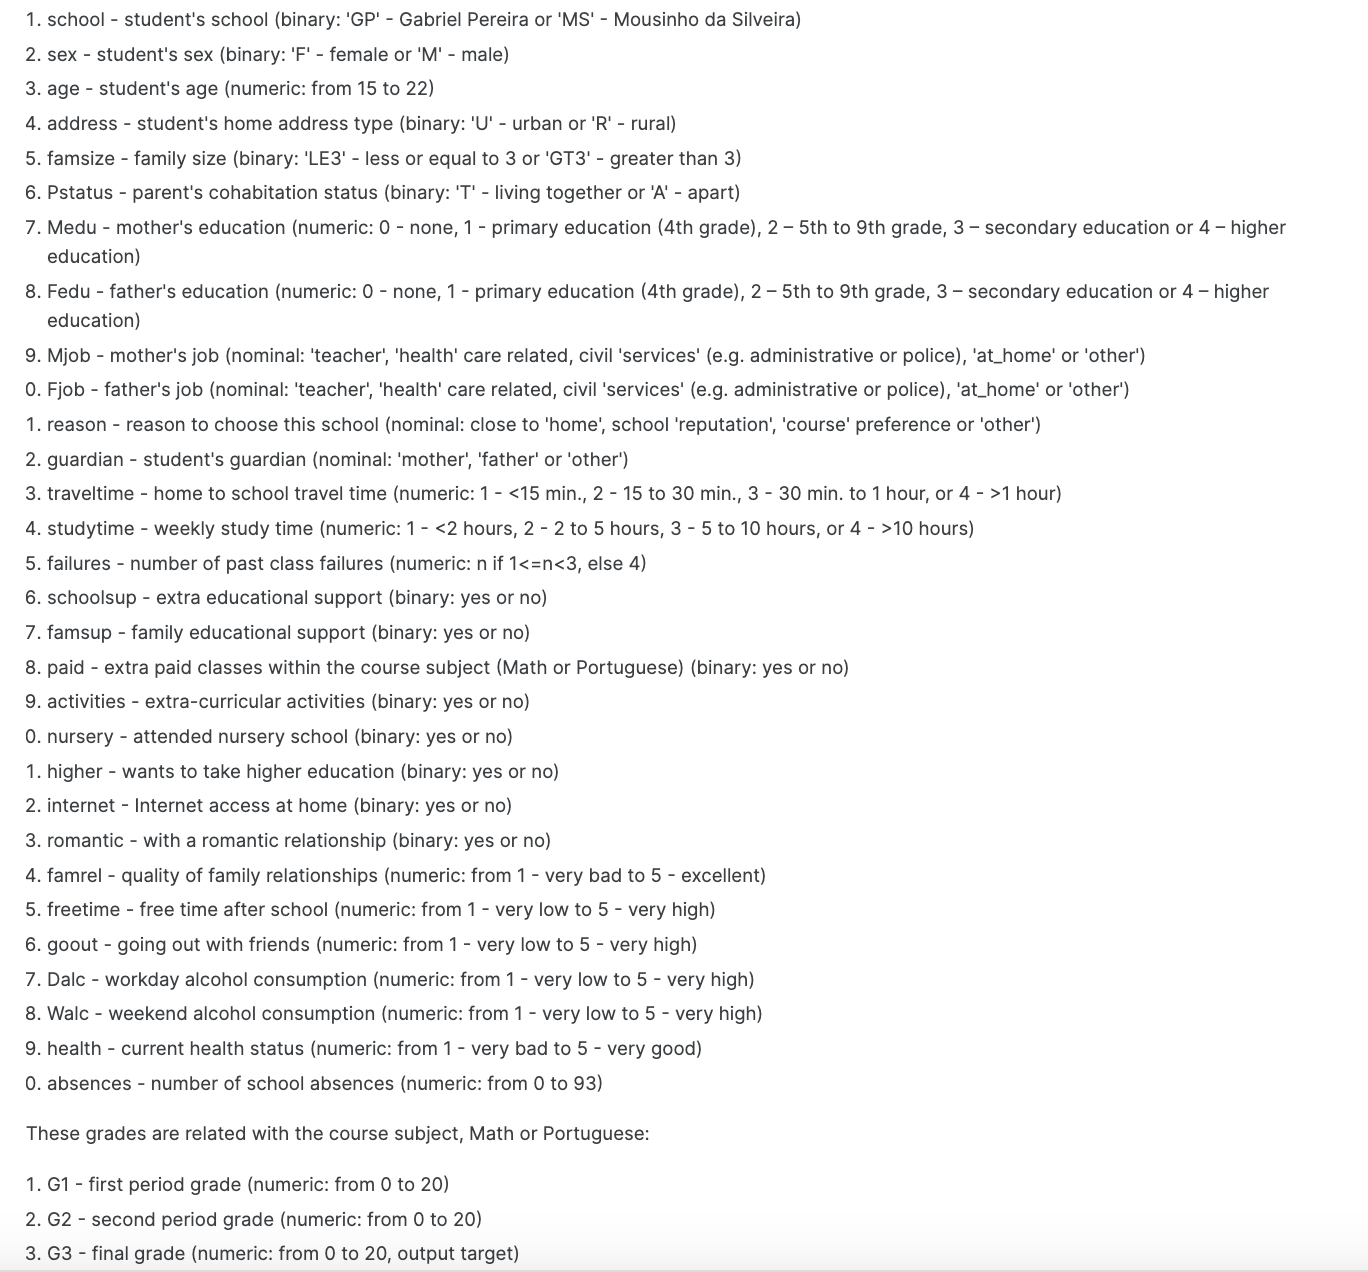

In [11]:
# importing requried python packages
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

# **Dataset Overview**

In [4]:
# Reads the student data from a github repository and stores it in a dataframe.
data_url = 'https://raw.githubusercontent.com/SindhuraGopalaRao/Exploratory-Data-Analysis-with-Python/main/Secret%20of%20Academic%20Success/student-mat.csv'

student_df = pd.read_csv(data_url)
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Dataset Exploration

In [5]:
# understanding the basic information of the data

def all_about_data(student):
    print("Some basic information about the data:\n")

    #shape of the dataframe
    print("Number of rows:",student_df.shape[0])
    print("Number of columns:",student_df.shape[1])

    #List column names
    print("\nColumn Names:")
    print(student_df.columns)

    #data types for each column in the dataframe
    print("\nDatatype of each columns:")
    print("Dataypes:",student_df.dtypes)

    #summary stats
    print("\nSummary Stats:")
    print(student_df.describe())

    #missing value inspection
    print("\nMissing Values:")
    print(student_df.isna().sum())

all_about_data(student_df)

Some basic information about the data:

Number of rows: 395
Number of columns: 33

Column Names:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Datatype of each columns:
Dataypes: school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      objec

# Data Cleaning

In [7]:
# finding the count of missing values in each column
student_df.isna().mean().round(4) * 100 

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


###  What are the __average__ final grade based on different genders?

In [9]:
# the average final grade (G3) based on different genders (sex: M/F)
avgg3_by_genders = student_df.groupby('sex').G3.mean()
avgg3_by_genders

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

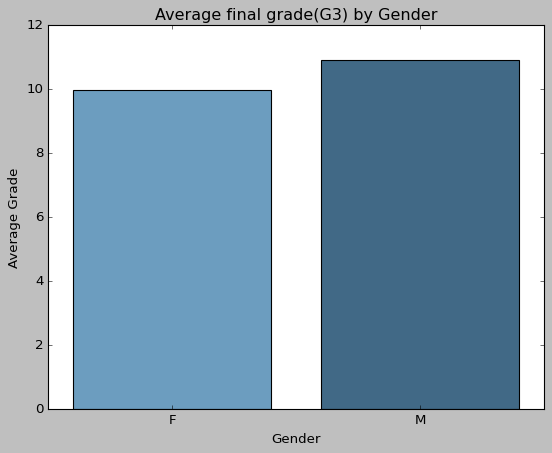

In [18]:
# visualization of the average final grade (G3) based on different genders (sex: M/F)
sns.barplot(
    x=avgg3_by_genders.index, 
    y=avgg3_by_genders.values,
    palette='Blues_d'
)
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.title('Average final grade(G3) by Gender')
plt.show()

### What are the __average__ final grade  based on whether the students have Internet access at home (``internet: yes/no``)?

In [20]:
# the average final grade (G3) based on whether the students have Internet access at home (internet: yes/no)
avgg3_by_internet = student_df.groupby('internet').G3.mean()
avgg3_by_internet

internet
no      9.409091
yes    10.617021
Name: G3, dtype: float64

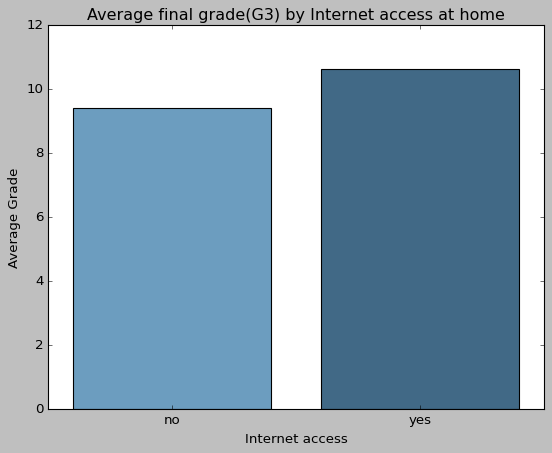

In [23]:
# visualization of the average final grade (G3) based on whether the students have Internet access at home (internet: yes/no)

sns.barplot(
    x=avgg3_by_internet.index, 
    y=avgg3_by_internet.values,
    palette='Blues_d'
)
plt.xlabel('Internet access')
plt.ylabel('Average Grade')
plt.title('Average final grade(G3) by Internet access at home')
plt.show()

### What are the __total__ absences (``absences``) across different schools (``school: GP/MS``)?

In [24]:
# the total absences (absences) across different schools (school: GP/MS)
absences_diff_school = student_df.groupby('school').absences.sum()
absences_diff_school

school
GP    2082
MS     173
Name: absences, dtype: int64

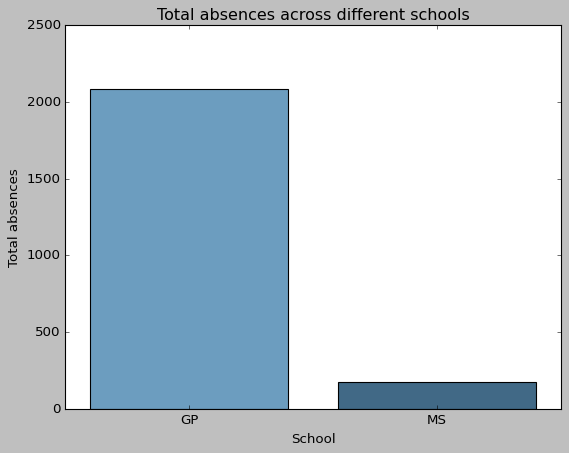

In [26]:
# visualization of the total absences (absences) across differentschools (school: GP/MS)

sns.barplot(
    x=absences_diff_school.index, 
    y=absences_diff_school.values,
    palette='Blues_d'
)
plt.xlabel('School')
plt.ylabel('Total absences')
plt.title('Total absences across different schools')
plt.show()

### What are the __average__ quality of family relationships (``famrel``) on different family sizes (``famesize``) __and__ parent's cohabitation status (``Pstatus: T/A``, T - living together, A - apart)?



In [27]:
# the average quality of family relationships on different family sizes and parent's cohabitation status
avg_famrel_famesize =student_df.groupby(['famsize','Pstatus']).famrel.mean()
avg_famrel_famesize

famsize  Pstatus
GT3      A          3.666667
         T          3.980769
LE3      A          4.100000
         T          3.872340
Name: famrel, dtype: float64

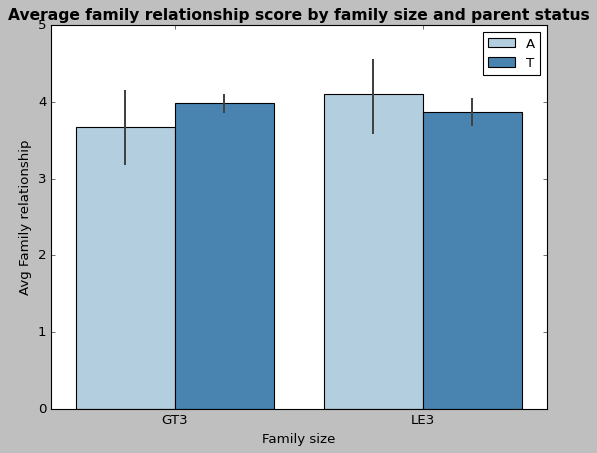

In [30]:
# visualization of the average quality of family relationships on different family sizes and parent's cohabitation status
sns.barplot(x = student_df['famsize'], y = student_df['famrel'], hue = student_df['Pstatus'], palette='Blues')

plt.title('Average family relationship score by family size and parent status', fontsize=14, fontweight='bold')
plt.xlabel('Family size', fontsize=12)
plt.ylabel('Avg Family relationship', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [31]:
#converting freetime as a categorical feature `ft_bin` and also checking if freetime > 2, then the ft_bin is set as high, otherwise low.
student_df['ft_bin'] = np.where(student_df['freetime'] > 2, 'high', 'low')

In [32]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ft_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,high
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,high
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,high
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,high


In [33]:
# we can test if above code and logic is correct
student_df[['freetime', 'ft_bin']].head(10)

,freetime,ft_bin
0,3,high
1,3,high
2,3,high
3,2,low
4,3,high
5,4,high
6,4,high
7,1,low
8,2,low
9,5,high



### What is the __average__ weekly study time (``studytime``) on difference in free time after school (``ft_bin``)?

In [34]:
# the average weekly study time (studytime) on difference in free time after school (ft_bin)
avg_studytime_ftbin = student_df.groupby('ft_bin').studytime.mean()
avg_studytime_ftbin

ft_bin
high    2.009615
low     2.132530
Name: studytime, dtype: float64

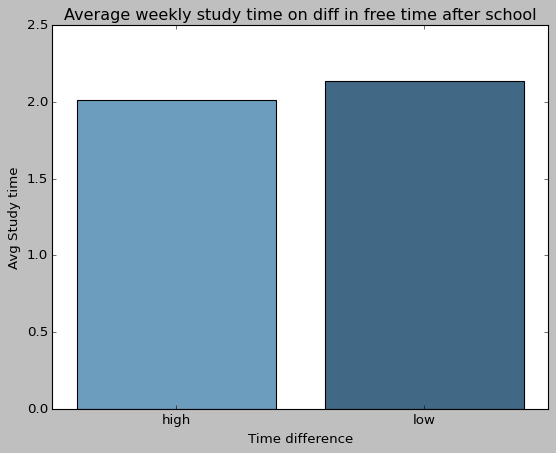

In [36]:
# visualization of the average weekly study time (studytime) on difference in free time after school (ft_bin)

sns.barplot(
    x=avg_studytime_ftbin.index, 
    y=avg_studytime_ftbin.values,
    palette='Blues_d'
)
plt.xlabel('Time difference')
plt.ylabel('Avg Study time')
plt.title('Average weekly study time on diff in free time after school')
plt.show()

In [37]:
# Capitalizing the reason to choose this school(reason) as a new column (reason_cap) & student's guardian(guardian) as a new column (guardian_cap).
student_df['reason_cap'] = student_df.reason.str.upper()
student_df['guardian_cap'] = student_df.guardian.str.upper()
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,high,COURSE,MOTHER
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,high,COURSE,FATHER
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,high,OTHER,MOTHER
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,low,HOME,MOTHER
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,high,HOME,FATHER


In [38]:
# test if above is correct
student_df[['reason', 'reason_cap']].head()

,reason,reason_cap
0,course,COURSE
1,course,COURSE
2,other,OTHER
3,home,HOME
4,home,HOME


In [39]:
student_df[['guardian', 'guardian_cap']].head()

,guardian,guardian_cap
0,mother,MOTHER
1,father,FATHER
2,mother,MOTHER
3,mother,MOTHER
4,father,FATHER


In [40]:
# New feature, Pwork, if both parent do not have a job((Mjob=='at_home') & (Fjob=='at_home')),then set the value of Pwork as 'no', otherwise 'yes'
student_df['Pwork'] = np.where((student_df['Mjob'] == 'at_home') & (student_df['Fjob'] == 'at_home'), 'no', 'yes')
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,high,COURSE,MOTHER,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,high,COURSE,FATHER,yes
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,high,OTHER,MOTHER,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,low,HOME,MOTHER,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,high,HOME,FATHER,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,5,10,15,15,15,high,REPUTATION,MOTHER,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,12,12,11,high,HOME,MOTHER,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,6,6,5,6,low,HOME,MOTHER,yes
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,0,16,18,19,low,HOME,MOTHER,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,5,0,14,15,15,high,HOME,MOTHER,yes


In [41]:
# test if above is correct
student_df[['Mjob', 'Fjob', 'Pwork']].head(20)

,Mjob,Fjob,Pwork
0,at_home,teacher,yes
1,at_home,other,yes
2,at_home,other,yes
3,health,services,yes
4,other,other,yes
5,services,other,yes
6,other,other,yes
7,other,teacher,yes
8,services,other,yes
9,other,other,yes


In [42]:
# average final grade (G3) by the extra educational support (schoolsup) and then the family educational support (famsup)
student_df.pivot_table(index=['schoolsup', 'famsup'], values='G3')

G3
schoolsup famsup           
no        no      10.650000
          yes     10.500000
yes       no      10.538462
          yes      9.052632

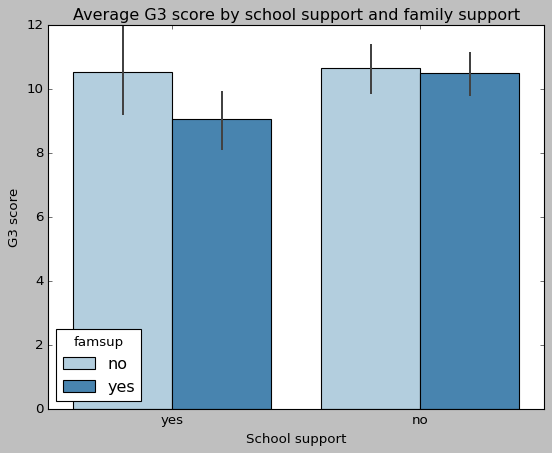

In [45]:
# visualizing the average final grade (G3) by the extra educational support (schoolsup) and then the family educational support (famsup)
sns.barplot(x = student_df['schoolsup'], y = student_df['G3'], hue = student_df['famsup'],palette='Blues')
plt.title('Average G3 score by school support and family support')
plt.xlabel('School support')
plt.ylabel('G3 score')
plt.show()




There is not much difference in final grades between students with the support. But, there is a slight dip even though there is a support from both school as well as family support. 

### Investigate the average final grade (``G3``) by _first_ if the student wants to take higher education (``higher``) and _then_ number of past class failures (``failures``).

In [46]:
# average final grade(G3) by first if the student wants to take higher education (higher) and then number of past class failures (failures)
student_df.pivot_table(index=['higher', 'failures'], values='G3')

G3
higher failures           
no     0          7.714286
       1          8.000000
       2          0.000000
       3          5.666667
yes    0         11.334426
       1          8.136364
       2          6.625000
       3          5.700000

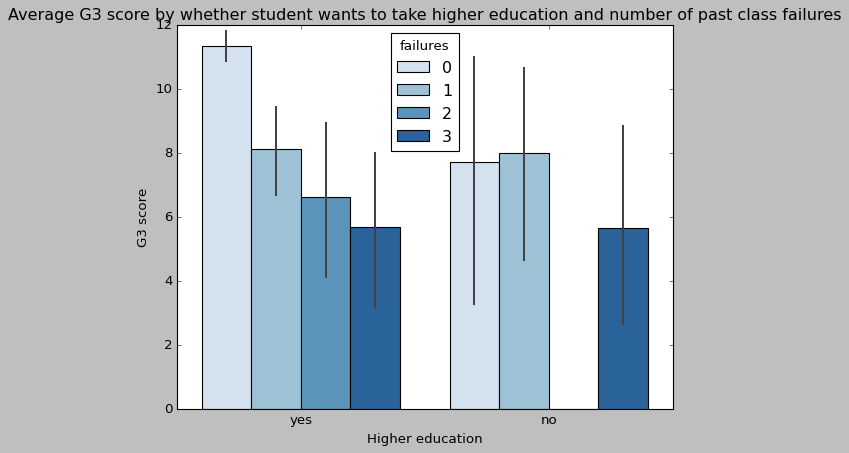

In [47]:
# average final grade(G3) by first if the student wants to take higher education (higher) and then number of past class failures (failures)
sns.barplot(x = student_df['higher'], y = student_df['G3'], hue = student_df['failures'],palette='Blues')
plt.title('Average G3 score by whether student wants to take higher education and number of past class failures')
plt.xlabel('Higher education')
plt.ylabel('G3 score')
plt.show()



There is a significant difference in final grades between students with and without class failures, and between students who want to take higher education or not. The number of students showed interest in higher education has less number of past failures.

In [48]:
# average final grade (G3) by first different age groups (age_grp) and gender (sex) and then high/low study time (st_bin)
student_df['st_bin'] = np.where(student_df['studytime'] > 5, 'high', 'low')
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork,st_bin
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,high,COURSE,MOTHER,yes,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,high,COURSE,FATHER,yes,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,high,OTHER,MOTHER,yes,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,low,HOME,MOTHER,yes,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,high,HOME,FATHER,yes,low
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,10,15,15,15,high,REPUTATION,MOTHER,yes,low
6,GP,M,16,U,LE3,T,2,2,other,other,...,3,0,12,12,11,high,HOME,MOTHER,yes,low
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,6,6,5,6,low,HOME,MOTHER,yes,low
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,0,16,18,19,low,HOME,MOTHER,yes,low
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,0,14,15,15,high,HOME,MOTHER,yes,low


In [49]:
# creating/spliting the age group (age_grp) into three groups
student_df['age_grp'] = pd.cut(student_df.age, 3, labels=['low', 'medium', 'high'])
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork,st_bin,age_grp
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,high,COURSE,MOTHER,yes,low,medium
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,high,COURSE,FATHER,yes,low,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,high,OTHER,MOTHER,yes,low,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,low,HOME,MOTHER,yes,low,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,high,HOME,FATHER,yes,low,low


In [50]:
# creating the pivot table by using st_bin and age_grp plus sex
student_df.pivot_table(index=['st_bin', 'age_grp'], columns='sex', values='G3')

sex                     F          M
st_bin age_grp                      
low    low      10.266667  11.470149
       medium    9.087719   9.428571
       high     15.000000  10.500000

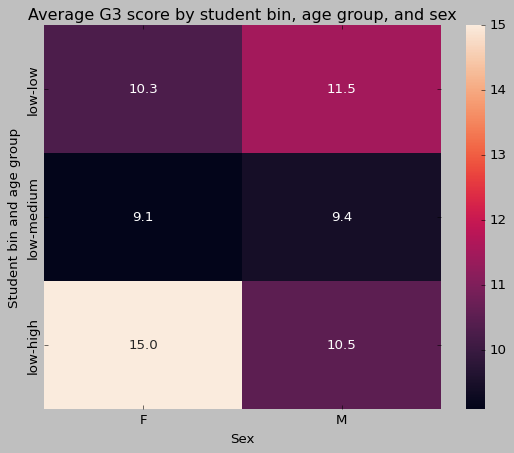

In [51]:
# visualizing the pivot table by using st_bin and age_grp plus sex
sns.heatmap(student_df.pivot_table(index=['st_bin', 'age_grp'], columns='sex', values='G3'), annot=True, fmt='.1f')
plt.title('Average G3 score by student bin, age group, and sex')
plt.xlabel('Sex')
plt.ylabel('Student bin and age group')
plt.show()


There is no drastic difference in final grades between male and female. however, female grades are slightly higher than male in high age group and male grades are bit higher in low age group. For medium age group the grades are similar.


### Split ``student_df`` based on extra paid classes witnin the course subject (``paid``). 

Keep paid students (``paid == 'yes'``) in a subset ``paid_df`` and unpaid students (``paid == 'no'``) in a subset ``unpaid_df``.

In [52]:
# spliting student_df based on extra paid classes witnin the course subject (paid).
# paid students (paid == 'yes') in a subset paid_df and unpaid students (paid == 'no') in a subset unpaid_df.

paid_df = student_df[student_df.paid == 'yes']
paid_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork,st_bin,age_grp
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,high,OTHER,MOTHER,yes,low,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,low,HOME,MOTHER,yes,low,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,high,HOME,FATHER,yes,low,low
5,GP,M,16,U,LE3,T,4,3,services,other,...,10,15,15,15,high,REPUTATION,MOTHER,yes,low,low
8,GP,M,15,U,LE3,A,3,2,services,other,...,0,16,18,19,low,HOME,MOTHER,yes,low,low


In [53]:
unpaid_df = student_df[student_df.paid == 'no']
unpaid_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork,st_bin,age_grp
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,high,COURSE,MOTHER,yes,low,medium
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,high,COURSE,FATHER,yes,low,low
6,GP,M,16,U,LE3,T,2,2,other,other,...,0,12,12,11,high,HOME,MOTHER,yes,low,low
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,6,6,5,6,low,HOME,MOTHER,yes,low,low
11,GP,F,15,U,GT3,T,2,1,services,other,...,4,10,12,12,low,REPUTATION,FATHER,yes,low,low


In [54]:
from scipy import stats

paid_df.shape, unpaid_df.shape

((181, 39), (214, 39))

In [55]:
unpaid_df_sample = unpaid_df.sample(n=181, random_state=42)
unpaid_df_sample.shape

(181, 39)

In [56]:
## Cross Checking with the internal scipy function
paid_grades = paid_df['G3']
unpaid_grades = unpaid_df_sample['G3']
t2, p2 = stats.ttest_ind(paid_grades,unpaid_grades)
print("t = " + str(t2))
print("p = " + str(p2))

t = 1.9827606626888783
p = 0.04815388677303937


From above results, we can see that the t-stat ``t > 1.96``, in the meanwhile the p-value ``p < 0.05``; thus, we can conclude that the extra paid classes do have a significant (at $p=0.05$ level) effect on the students' final grades.



### Join the sub dataframes back together as ``merged``.

In [57]:
#  Joiniing the sub dataframes back together as merged.
merged =   pd.concat([paid_df,unpaid_df])
merged.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,ft_bin,reason_cap,guardian_cap,Pwork,st_bin,age_grp
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,high,OTHER,MOTHER,yes,low,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,low,HOME,MOTHER,yes,low,low
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,high,HOME,FATHER,yes,low,low
5,GP,M,16,U,LE3,T,4,3,services,other,...,10,15,15,15,high,REPUTATION,MOTHER,yes,low,low
8,GP,M,15,U,LE3,A,3,2,services,other,...,0,16,18,19,low,HOME,MOTHER,yes,low,low
9,GP,M,15,U,GT3,T,3,4,other,other,...,0,14,15,15,high,HOME,MOTHER,yes,low,low
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,0,10,8,9,high,REPUTATION,MOTHER,yes,low,low
12,GP,M,15,U,LE3,T,4,4,health,services,...,2,14,14,14,high,COURSE,FATHER,yes,low,low
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,2,10,10,11,high,COURSE,MOTHER,yes,low,low
16,GP,F,16,U,GT3,T,4,4,services,services,...,6,13,14,14,low,REPUTATION,MOTHER,yes,low,low


Comparing to the original ``student_df``, in ``merged`` the first $181$ rows are students taking extra paid classes, the rest of the DF are students not extra paid classes. 

